In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE


In [34]:
# generating high-dimensional data
cov = 0.1*np.identity(10)
mu1 = np.ones(10)
mu2 = 10*np.ones(10)
cluster1 = np.random.multivariate_normal(mu1,cov,10)
cluster2 = np.random.multivariate_normal(mu2,cov,10)
X = np.concatenate((cluster1,cluster2))


In [35]:
# KL Divergence of multivariate distributions
def KL_div(p,q):
    p = np.asarray(p)
    q = np.asarray(q)
    d = 0
    for i in range(len(p)):
        if (p[i]!=0):
            d = d + p[i]*np.log2(p[i]/q[i])
    return d
def kL_2d(P,Q):
    s = 0
    for i in range(len(P)):
        s = s + KL_div(P[i],Q[i])
    return s

test = [[0.1,0.2],[0.1,0.2]]
print(kL_2d(test,test))

0.0


In [36]:
# calcluating denominator of equation probability distribution
def sum_distances(data,index,sigma):
    s = 0
    for i in range(len(data)):
        if (i != index):
            s = s + np.exp(-(((np.linalg.norm(data[i]-data[index]))**2)/(2*(sigma**2))))
    return s

# calculating the conditional probability matrix of high-dimensional points
def prob_mat(data,sigma_array):
    n = len(data)
    p = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if (i != j):
                p[i][j] =  np.exp(-((np.linalg.norm(data[i]-data[j]))**2/(2*(sigma_array[i]**2))))/(sum_distances(data,i,sigma_array[i]))
    return p

# calculating the probability matrix of high-dimensional points
def sym_prob_mat(data,sigma_array):
    n = len(data)
    p = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if (i != j):
                p[i][j] =  np.exp(-((np.linalg.norm(data[i]-data[j]))**2/(2*(sigma_array[i]**2))))/(sum_distances(data,i,sigma_array[i]))
    return (p + np.transpose(p))/(2*n)

# probability matrix of embedded points
def map_prob(Y):
    den = 0
    for i in range(len(Y)-1):
        for j in range(i+1,len(Y)):
            den = den + (1+(np.linalg.norm(Y[i]-Y[j]))**2)**(-1)
    q = np.zeros((len(Y),len(Y)))
    for i in range(len(Y)):
        for j in range(len(Y)):
            if (i != j):
                q[i][j] = ((1+(np.linalg.norm(Y[i]-Y[j]))**2)**(-1))/den
    return q
            

# gradient of cost function
def grad(data,sigma_array,Y):
    g = []
    n = len(data)
    p = sym_prob_mat(data,sigma_array)
    q = map_prob(Y)
    for i in range(n):
        s = [0,0]
        for j in range(n):
            s= s + (p[i][j]-q[i][j])*((1+(np.linalg.norm(Y[i]-Y[j]))**2)**(-1))*(Y[i]-Y[j])
        g.append(4*s)
    return np.array(g)

# gradient descent algo
def grad_desc(T,learn_rate,alpha,data,sigma_array):
    y = np.random.multivariate_normal(np.zeros((2)),10**(-4)*np.identity(2),len(data))
    y_t = np.array([np.zeros((len(data),2))]*(T+2))
    y_t[1] = y
    for i in range(2,T+2):
        y_t[i] = y_t[i-1] + learn_rate*grad(data,sigma_array,y_t[i-1]) + alpha*(y_t[i-1]-y_t[i-2])
    return y_t[T+1]
    

###  plot of Y at the beginning and end of 50 iterations

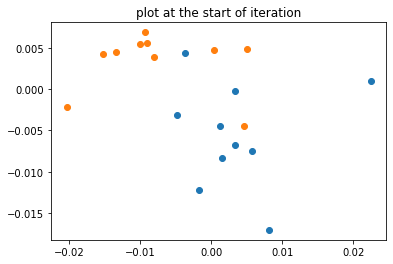

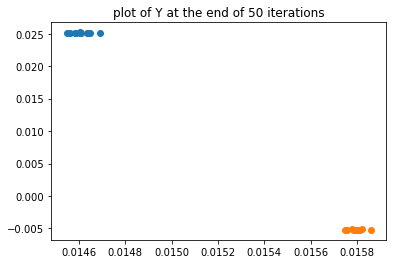

In [37]:
sig = [0.6]*10
sig_ = [0.6]*20
map_points1 = grad_desc(1,4,0.8,cluster1,sig)
map_points2 = grad_desc(1,4,0.8,cluster2,sig)
p = sym_prob_mat(X,sig_)
mp1 = np.concatenate((map_points1,map_points2))
q_first = map_prob(mp1)
plt.scatter(map_points1[:,0],map_points1[:,1])
plt.scatter(map_points2[:,0],map_points2[:,1])
plt.title("plot at the start of iteration")
plt.show()
#sig = [0.1]*10
map_points1_l = grad_desc(50,4,0.8,cluster1,sig)
map_points2_l = grad_desc(50,4,0.8,cluster2,sig)
mp2 = np.concatenate((map_points1_l,map_points2_l))
q_last = map_prob(mp2)
plt.scatter(map_points1_l[:,0],map_points1_l[:,1])
plt.scatter(map_points2_l[:,0],map_points2_l[:,1])
plt.title("plot of Y at the end of 50 iterations")
plt.show()

At the start of the iterations the map_points are close. After 50 iterations the map points are far away which can be observed from the limits of axes in the above plots.

In [38]:
print("KL divergence after one iteration: ",kL_2d(p,q_first))
print("KL divergence after 50 iterations: ",kL_2d(p,q_last))

KL divergence after one iteration:  0.4192535862401783
KL divergence after 50 iterations:  0.41866047498559333


### experimenting with different values of $\eta$ and $\alpha$

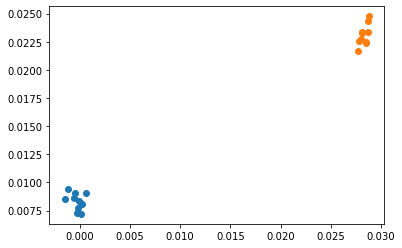

In [39]:
map_points1 = grad_desc(50,1,0.9,cluster1,sig)
map_points2 = grad_desc(50,1,0.9,cluster2,sig)
plt.scatter(map_points1[:,0],map_points1[:,1])
plt.scatter(map_points2[:,0],map_points2[:,1])

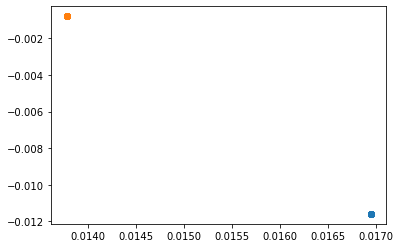

In [40]:
map_points1 = grad_desc(50,5,0.7,cluster1,sig)
map_points2 = grad_desc(50,5,0.7,cluster2,sig)
plt.scatter(map_points1[:,0],map_points1[:,1])
plt.scatter(map_points2[:,0],map_points2[:,1])

Text(0.5, 0, 'perplexity=40')

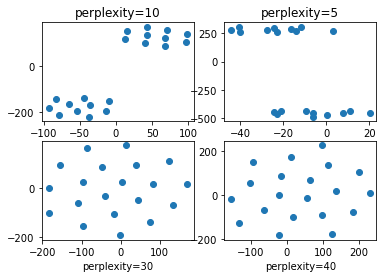

In [41]:
# using sklearn's in-built TSNE
y1 = TSNE(n_components=2,perplexity=10).fit_transform(X)
y2 = TSNE(n_components=2,perplexity=5).fit_transform(X)
y3 = TSNE(n_components=2,perplexity=30).fit_transform(X)
y4 = TSNE(n_components=2,perplexity=40).fit_transform(X)

figure, axis = plt.subplots(2, 2)
  
axis[0, 0].scatter(y1[:,0],y1[:,1])
axis[0, 0].set_title("perplexity=10")
  
axis[0, 1].scatter(y2[:,0],y2[:,1])
axis[0, 1].set_title("perplexity=5")
  
axis[1, 0].scatter(y3[:,0],y3[:,1])
axis[1, 0].set_xlabel("perplexity=30")
  
axis[1, 1].scatter(y4[:,0],y4[:,1])
axis[1, 1].set_xlabel("perplexity=40")

As perplexity increases the map points from the clusters merge together.